# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#--------------------------------------------------
# DEPENDANCIES
#--------------------------------------------------
import os
import json
import requests
import pandas as pd
from api_keys import weather_api_key
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

## Generate Cities List

In [2]:
#--------------------------------------------------
# IMPRORT WORLD CITIES CSV
#--------------------------------------------------
city_data_path = "worldcities.csv"
city_data = pd.read_csv(city_data_path)
city_data.head()

#--------------------------------------------------
# GENERATE RANDOM LIST OF 500 CITIES
#--------------------------------------------------
cities = random.sample(list(city_data["City"]),650)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#--------------------------------------------------
# PERFORM API CALLS
#--------------------------------------------------

# Create empty lists
city_list = []
lat_list = []
long_list = []
temparature_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []

# Set url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set city count to 0
city_number = 0

# set units to metric
units = "metric"

# Loop through each city
for city in cities:
    
    # Add 1 to city count
    city_number += 1

    # build query url
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city

    # Create search query, make request and store in json
    response = requests.get(query_url)
    response_json = response.json()
    
    # print log of city number and name
    print(f'City number {city_number} is {city}.')

    # Try and except keyerrors.  Append values to lists
    try:
        city_list.append(response_json["name"])
        lat_list.append(response_json["coord"]["lat"])
        long_list.append(response_json["coord"]["lon"])
        temparature_list.append(response_json["main"]["temp_max"])
        humidity_list.append(response_json["main"]["humidity"])
        cloudiness_list.append(response_json["clouds"]["all"])
        wind_speed_list.append(response_json["wind"]["speed"])
        country_list.append(response_json["sys"]["country"])
    except:
        KeyError


City number 1 is demyanovo.
City number 2 is hardoi.
City number 3 is molina de segura.
City number 4 is aiton.
City number 5 is passy.
City number 6 is atouguia da baleia.
City number 7 is baiquan.
City number 8 is shediac.
City number 9 is dumanjug.
City number 10 is severnyy-kospashskiy.
City number 11 is buzmeyin.
City number 12 is tanay.
City number 13 is inangatan.
City number 14 is buyabod.
City number 15 is crown point.
City number 16 is hangha.
City number 17 is vela.
City number 18 is gesztely.
City number 19 is dhar.
City number 20 is wang saphung.
City number 21 is el chimbo.
City number 22 is jaggayyapeta.
City number 23 is gonaives.
City number 24 is quesnel.
City number 25 is arzni.
City number 26 is kochubey.
City number 27 is batar.
City number 28 is limot.
City number 29 is belen.
City number 30 is boone.
City number 31 is profitis ilias.
City number 32 is glamoc.
City number 33 is fresno.
City number 34 is zajecar.
City number 35 is isabela.
City number 36 is plzen.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create output df with required results
output_df = pd.DataFrame(
    {"City": city_list,
     "Country": country_list,
     "Latitude": lat_list,
     "Longitude": long_list,
     "Temperature": temparature_list,
     "Humidity": humidity_list,
     "Cloudiness": cloudiness_list,    
     "Wind_Speed": wind_speed_list,    
    }
)

# Output to csv
output_df.to_csv('cities_df.csv')

# Display df
output_df

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed
0,Dem'yanovo,RU,60.3511,47.0842,2.43,81,98,1.90
1,Hardoī,IN,27.4167,80.1167,39.40,10,0,5.44
2,Molina de Segura,ES,38.0546,-1.2076,13.22,80,73,1.34
3,Aiton,RO,46.6833,23.7333,10.15,82,0,3.09
4,Passy,FR,45.9203,6.6877,8.04,99,100,1.71
...,...,...,...,...,...,...,...,...
611,Bytów,PL,54.1706,17.4919,5.39,86,100,3.84
612,Humble,US,29.9988,-95.2622,24.97,80,40,4.63
613,Nogales,MX,31.3086,-110.9422,15.76,12,0,3.09
614,San Juan Chamelco,GT,15.4333,-90.3333,15.52,95,43,0.88


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

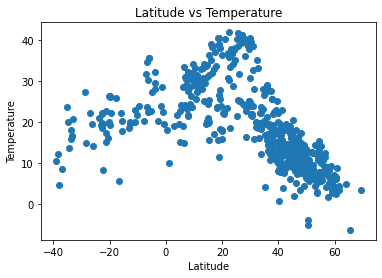

In [5]:
# Set x_values and y_values
x_values = lat_list
y_values = temparature_list

# Plot the data
plt.scatter(x_values,y_values)

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature")

# Save to Images folder
plt.savefig("Images/Latitude_vs_Temperature.png");



## Latitude vs. Humidity Plot

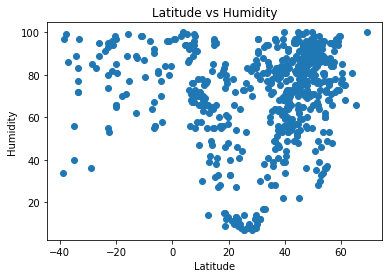

In [6]:
# Set x_values and y_values
x_values = lat_list
y_values = humidity_list

# Plot the data
plt.scatter(x_values,y_values)

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

# Save to Images folder
plt.savefig("Images/Latitude_vs_Humidity.png");


## Latitude vs. Cloudiness Plot

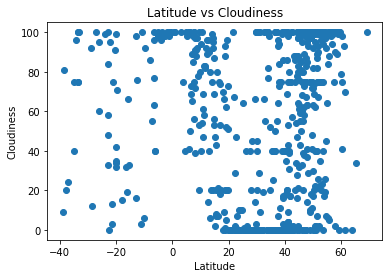

In [7]:
# Set x_values and y_values
x_values = lat_list
y_values = cloudiness_list

# Plot the data
plt.scatter(x_values,y_values)

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

# Save to Images folder
plt.savefig("Images/Latitude_vs_Cloudiness.png");


## Latitude vs. Wind Speed Plot

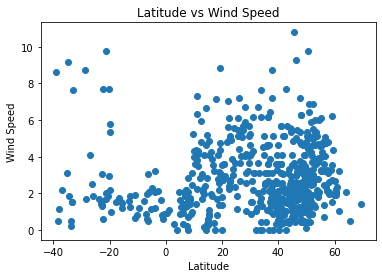

In [8]:
# Set x_values and y_values
x_values = lat_list
y_values = wind_speed_list

# Plot the data
plt.scatter(x_values,y_values)

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

# Save to Images folder
plt.savefig("Images/Latitude_vs_Wind Speed.png");


## Linear Regression

In [9]:
north_hem_df = output_df.loc[output_df['Latitude'] >= 0]
south_hem_df = output_df.loc[output_df['Latitude'] < 0]

north_lat = north_hem_df["Latitude"]
north_long = north_hem_df["Longitude"]
north_temp = north_hem_df["Temperature"]
north_humidity = north_hem_df["Humidity"]
north_cloud = north_hem_df["Cloudiness"]
north_wind = north_hem_df["Wind_Speed"]

south_lat = south_hem_df["Latitude"]
south_long = south_hem_df["Longitude"]
south_temp = south_hem_df["Temperature"]
south_humidity = south_hem_df["Humidity"]
south_cloud = south_hem_df["Cloudiness"]
south_wind = south_hem_df["Wind_Speed"]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The line_eq is: y = -0.51x + 36.01


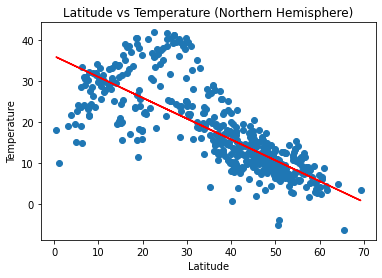

In [10]:
# Set x_values and y_values
x_values = north_lat
y_values = north_temp

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,270),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature (Northern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Temperature (Northern Hemisphere).png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The line_eq is: y = 0.36x + 27.6


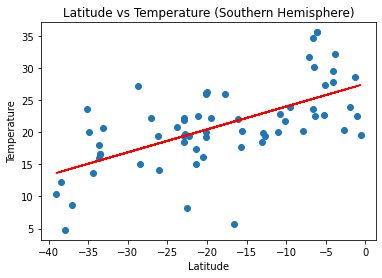

In [11]:
# Set x_values and y_values
x_values = south_lat
y_values = south_temp

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,302),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature (Southern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Temperature (Southern Hemisphere).png")



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line_eq is: y = 0.42x + 53.77


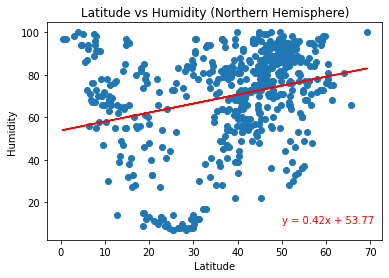

In [12]:
# Set x_values and y_values
x_values = north_lat
y_values = north_humidity

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity (Northern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Humidity (Northern Hemisphere).png")



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line_eq is: y = 0.11x + 81.28


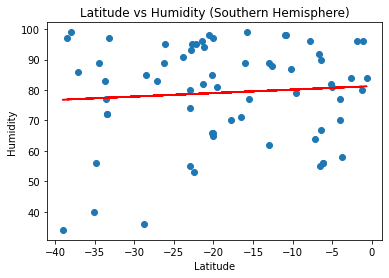

In [13]:
# Set x_values and y_values
x_values = south_lat
y_values = south_humidity

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-18,20),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity (Southern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Humidity (Southern Hemisphere).png")



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line_eq is: y = 0.39x + 41.1


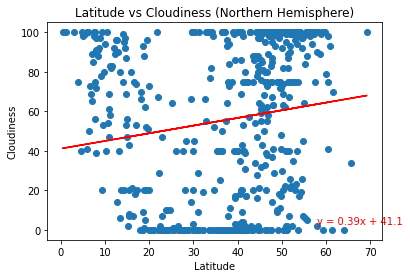

In [14]:
# Set x_values and y_values
x_values = north_lat
y_values = north_cloud

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(58,3),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness (Northern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Cloudiness (Northern Hemisphere).png")



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line_eq is: y = 0.67x + 77.84


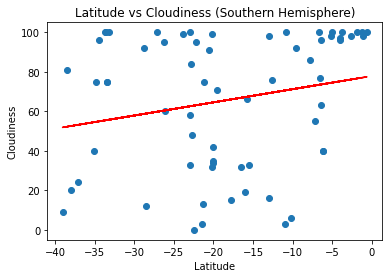

In [15]:
# Set x_values and y_values
x_values = south_lat
y_values = south_cloud

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,50),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness (Southern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Cloudiness (Southern Hemisphere).png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line_eq is: y = 0.0x + 2.63


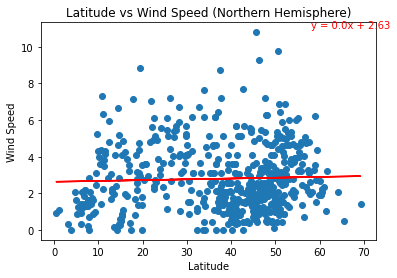

In [16]:
# Set x_values and y_values
x_values = north_lat
y_values = north_wind

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(58,11),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed (Northern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Wind Speed (Northern Hemisphere).png")




####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line_eq is: y = -0.07x + 1.25


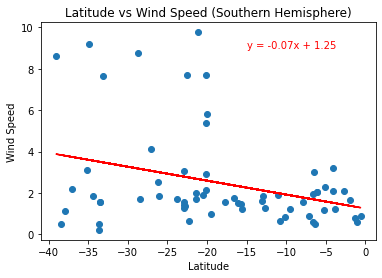

In [17]:
# Set x_values and y_values
x_values = south_lat
y_values = south_wind

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values,y_values)

# Add the linear regression line to plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15,9),fontsize=10,color="red")

# Set title and axis titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed (Southern Hemisphere)")

# Print the line equation value
print(f"The line_eq is: {line_eq}")

# Save to Images folder
plt.savefig("Images/Linear_Regression/Latitude vs Wind Speed (Southern Hemisphere).png")

